# Fracture- and Damage Mechanics
# Excercise 6 - Finite Fracture Mechanics - Solution

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Excercise 6.1 - Crack emanating at a V-Notch

We consider an infinite half plane with an edge. The material is loaded in tension.

<img src="V-Notch.png"
     alt="Sketch of a crack nucleating at an ellipse"
     height="300"
     style="display: block; margin: 0 auto;">

The material properties are 

* $\mathcal{G}_c$     = 0.394 mJ/mm^2 => 394 J/m^2

* $\sigma_c$ = 124 MPa.

* E = 4000 MPa

The stress in the crack ligament and the incremental Energy Release Rate are plotted in the interactive figure below.

Use the sliders to determine the failure load of the structure.

$$
    \sigma_\text{nenn}  = A r^{\lambda-1}
$$

$$
    \mathcal{G}_\text{inc} = \frac{1}{\Delta a} \int_a^{a+\Delta a} \mathcal{G}(\tilde{a}) d\tilde{a}= \frac{1}{\Delta a} \int_a^{a+\Delta a} \frac{K_I(\tilde{a})^2}{E} d\tilde{a}  = \frac{\Pi (a) - \Pi (a+\Delta a)}{b \Delta a} \leftrightarrow \frac{1}{\Delta a} \int_a^{a + \Delta a} K_I^2(\tilde{a}) d\tilde{a} = K_{Ic}^2 
$$

In [2]:
B = 5 # Depth of the notch
A = 5 # Geometry Factor
lamb = 0.3
x = np.linspace(0.001, 5, 5000)     # mm
da = x
sigma_infty = 10  # MPa
E = 4000  # MPa
y1_lim = 250  # MPa
y2_lim = 2.1  # mJ/mm^2

K_c = lambda a, sigma_infty: sigma_infty * np.sqrt(np.pi * a) **(1-lamb)

def FFM_widget_1(sigma_infty_val=10, sigma_c_val=124, G_c_val=0.394):
    sigma_infty = sigma_infty_val  # MPa
    sigma_c = sigma_c_val  # MPa
    G_c = G_c_val  # N/mm

    # Stress Criterion
    sigma_x = A * sigma_infty_val / x**(1-lamb)

    # Energy Criterion
    G_inc = []
    for d in da:
        G_inc.append(quad(K_c, 0, d, args=(sigma_infty,))[0]**2 /E)
    G_inc = np.array(G_inc)
    
    # Create plots
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # Insert data
    sigma, = ax1.plot(x, sigma_x, color='tab:blue', linewidth=2, label=r'$\sigma(x)$')
    sigma_y = ax1.axhline(y=sigma_c, color='tab:blue', linestyle='--', label=r'$\sigma_y$')
    G_inc_line, = ax2.plot(da, G_inc, color='tab:orange', label=r'$\mathcal{G}_\text{inc}$')
    G_c_line = ax2.axhline(y=G_c, color='tab:orange', linestyle='--', label=r'$\mathcal{G}_c$')

    #boundary
    x_max = 0
    for i in range(len(x)):
        if sigma_x[i] > sigma_c:
            x_max = x[i]
        else:
            break

    da_min = 0
    for i in range(len(da)):
        if G_inc[i] > G_c:
            da_min = da[i]
            break


    # Labels and title
    ax1.set_xlabel('Crack Length (mm)')
    ax1.set_ylabel(r'Stress $\sigma$ (MPa)')
    ax2.set_ylabel(r'Energy Release Rate $\mathcal{G}_\text{inc}$ (mJ/mm$^2$)')
    ax1.set_title('Stress and incremental Energy Release Rate vs Crack Length')

    ax1.set_ylim(0, y1_lim)
    ax2.set_ylim(0, y2_lim)
    handles = [sigma, sigma_y, G_inc_line, G_c_line]
    ax2.legend(handles=handles, labels=[h.get_label() for h in handles], loc='best')
    plt.xlim(0, 5)
    ax1.grid(True)
    plt.show()

    return

def FFM_widget_2(sigma_infty_val=10, sigma_c_val=124, G_c_val=0.394):
    sigma_infty = sigma_infty_val  # MPa
    sigma_c = sigma_c_val  # MPa
    G_c = G_c_val  # N/mm

    # Stress Criterion
    sigma_x = A * sigma_infty_val / x**(1-lamb) # This needs to be updated with the accurate formula

    # Energy Criterion
    G_inc = []
    for d in da:
        G_inc.append(quad(K_c, 0, d, args=(sigma_infty,))[0]**2 /E)
    G_inc = np.array(G_inc)
    
    # Create plots
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # Insert data
    sigma, = ax1.plot(x, sigma_x, color='tab:blue', linewidth=2, label=r'$\sigma(x)$')
    sigma_y = ax1.axhline(y=sigma_c, color='tab:blue', linestyle='--', label=r'$\sigma_y$')
    G_inc_line, = ax2.plot(da, G_inc, color='tab:orange', label=r'$\mathcal{G}_\text{inc}$')
    G_c_line = ax2.axhline(y=G_c, color='tab:orange', linestyle='--', label=r'$\mathcal{G}_c$')

    # Boundary
    x_max = 0
    for i in range(len(x)):
        if sigma_x[i] > sigma_c:
            x_max = x[i]
        else:
            break

    da_min = 5
    for i in range(len(da)):
        if G_inc[i] > G_c:
            da_min = da[i]
            break

    # Fill area where each criterion is met
    ax1.fill_betweenx(
        y=np.linspace(0, y1_lim, 2),
        x1=0,
        x2=x_max,
        color='tab:blue',
        alpha=0.3,
        zorder=0
    )

    ax2.fill_betweenx(
        y=np.linspace(0, y2_lim, 2),
        x1=da_min,
        x2=max(da),
        color='tab:orange',
        alpha=0.3,
        zorder=0
    )

    if da_min < x_max:
        # Run from small x to large x
        for i in range(len(x)):
            if sigma_x[i]/sigma_c < np.sqrt(G_inc[i]/G_c): # Check if Energy criterion is "larger" than stress crit
                ax1.axvline(x=x[i], color='red', zorder=5)
                ax2.text(
                        2,
                        1.9,
                        rf'A crack nucleates for $\Delta a$ = {x[i]:.1f} mm and $\sigma_\infty$ = {sigma_infty_val * sigma_c/sigma_x[i]:.1f} MPa',
                        ha='left',
                        va='top',
                        fontsize=10,

                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
                    )
                break

    # Labels and title
    ax1.set_xlabel('Crack Length (mm)')
    ax1.set_ylabel(r'Stress $\sigma$ (MPa)')
    ax2.set_ylabel(r'Energy Release Rate $\mathcal{G}_\text{inc}$ (mJ/mm$^2$)')
    ax1.set_title('Stress and incremental Energy Release Rate vs Crack Length')

    ax2.text(
        x_max,
        0.2,
        f'$x_{{max}}$ = {x_max:.3f} mm',
        ha='left',
        va='top',
        fontsize=10,
        color='tab:blue',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )

    if da_min < 5:
        ax2.text(da_min, 
            0.4, 
            rf'$\Delta a_{{min}}$ = {da_min:.3f} mm', 
            ha='left', 
            va='top', 
            fontsize=10, 
            color='tab:orange',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
        )

    ax1.set_ylim(0, y1_lim)
    ax2.set_ylim(0, y2_lim)
    handles = [sigma, sigma_y, G_inc_line, G_c_line]
    ax2.legend(handles=handles, labels=[h.get_label() for h in handles], loc='best')
    plt.xlim(0, 5)
    ax1.grid(True)
    plt.show()

    return

In [3]:
widgets.interact(
    FFM_widget_2,
    sigma_infty_val=widgets.IntSlider(
        min=2, max=30, step=1, value=10,
        description="σ∞"
    ),
    sigma_c_val=widgets.IntSlider(
        min=50, max=200, step=1, value=200,
        description="σc"
    ),
    G_c_val=widgets.FloatSlider(
        min=0.1, max=2.0, step=0.01, value=2.,
        description="Gc"
    )
);

interactive(children=(IntSlider(value=10, description='σ∞', max=30, min=2), IntSlider(value=200, description='…

A crack nucleates for $\Delta a = 0.8$ mm and $\sigma_\infty = 20.8 $ MPa.

## Exercise 6.2 - Critical load on an elliptical hole

We want to assess the failure load for crack nucleation on a previous existing hole in an elastic infinite domain using the coupled criterion of finite fracture mechanics. The material properties given in exercise 6a. 

The stress field in the crack ligament is given analytically in Cartesian coordinates by [Kirsch, 1898] as: 


$$
    \sigma_y = \frac{\sigma_\infty}{2} \left [ 2 + \left (\frac{R}{x} \right)^2 + 3 \left ( \frac{R}{x} \right )^4 \right ]
$$

The stress intensity factor is given by (Weißgraeber et al., 2016) as:

$$
    K_I = \sigma_\infty \sqrt{\pi R} \left [ \sqrt{\frac{a}{R}} \frac{3+2\frac{a}{R}}{2 \left(1+\frac{a}{R} \right)} \left[ 1+ \frac{1.243}{\left(1+\frac{a}{R} \right )^3} \right ]  \right] 
$$

<img src="CrackNucleationEllipse.png"
     alt="Sketch of a crack nucleating at an ellipse"
     height="300"
     style="display: block; margin: 0 auto;">

a) Determine the maximum far field load for a hole with $r=10$ mm


In [4]:
# Introduce Variables
x = np.linspace(0.01, 5.0, 500)
da = x

# Introduce Constants
sigma_c = 124  # MPa
G_c = 0.394  # N/mm
E = 4000  # MPa
K_Ic = np.sqrt( E * G_c )  # MPa√mm
R = 10  # mm

# Stress Criterion
sigma_infty_FFM_S = 2 * sigma_c / (2 + (R/(R+x))**2 + 3 * (R/(R+x))**4)

# Energy Criterion
K_I_circular_hat = lambda a, R: 1.1215 * (1 + a/(a+R)) / np.sqrt(1 + 5.04 * a/R * (R/(R+a))**(1-np.tanh(3*R/(2*a)))) * np.sqrt(np.pi * a)
K_I_circular_hat_squared = lambda a, R: K_I_circular_hat(a, R)**2
sigma_infty_FFM_E = []
for d in da:
    sigma_infty_FFM_E.append(np.sqrt( K_Ic**2 * d /  quad(K_I_circular_hat, 0, d, args=(R,))[0]))

# Find stress, where both criteria are met
sigma_infty_FFM = np.zeros_like(x)
for n in range(len(x)):
    sigma_infty_FFM[n] = max(sigma_infty_FFM_S[n], sigma_infty_FFM_E[n])

# Find minimum critical stress to fullfill both criteria
sigma_infty_min = min(sigma_infty_FFM)
print(f'Minimum Critical Stress σ∞: {sigma_infty_min:.3f} MPa')

Minimum Critical Stress σ∞: 44.910 MPa


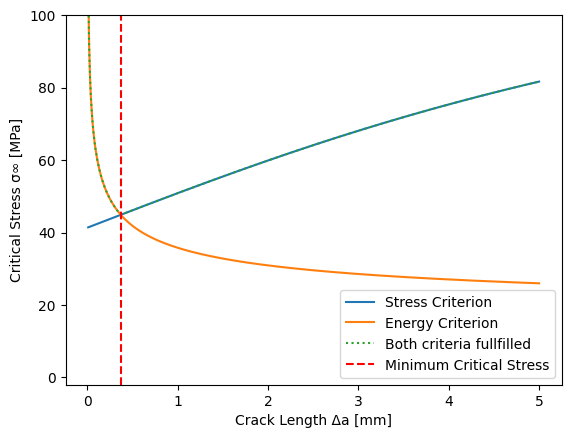

In [5]:
# Plot the results
plt.plot(x, sigma_infty_FFM_S, label='Stress Criterion')
plt.plot(da, sigma_infty_FFM_E, label='Energy Criterion')
plt.plot(x, sigma_infty_FFM, linestyle='dotted', label='Both criteria fullfilled')
plt.axvline(x=x[np.argmin(sigma_infty_FFM)], color='red', linestyle='--', label='Minimum Critical Stress')
plt.legend()
plt.ylabel('Critical Stress σ∞ [MPa]')
plt.xlabel('Crack Length Δa [mm]')
plt.ylim(-2, 100.0)
plt.show()

A crack will nucleate for the far field load of $\sigma_\infty = 41,8$ MPa.

b) Do the same calculation for a smaller ($r = 1$ mm) and larger ($r = 100$ mm) Radius and compare and interpret the results.

In [6]:
def calcSigmafromR(R, K_Ic, sigma_c):
    x = np.linspace(0.01, 5.0, 500)
    da = x

    # Stress Criterion
    sigma_infty_FFM_S = 2 * sigma_c / (2 + (R/(R+x))**2 + 3 * (R/(R+x))**4)

    # Energy Criterion
    K_I_circular_hat = lambda a, R: 1.1215 * (1 + a/(a+R)) / np.sqrt(1 + 5.04 * a/R * (R/(R+a))**(1-np.tanh(3*R/(2*a)))) * np.sqrt(np.pi * a)
    K_I_circular_hat_squared = lambda a, R: K_I_circular_hat(a, R)**2
    sigma_infty_FFM_E = []
    for d in da:
        sigma_infty_FFM_E.append(np.sqrt( K_Ic**2 * d /  quad(K_I_circular_hat, 0, d, args=(R,))[0]))

    # Find stress, where both criteria are met
    sigma_infty_FFM = np.zeros_like(x)
    for n in range(len(x)):
        sigma_infty_FFM[n] = max(sigma_infty_FFM_S[n], sigma_infty_FFM_E[n])

    # Find minimum critical stress to fullfill both criteria
    sigma_infty_min = min(sigma_infty_FFM)
    return sigma_infty_min

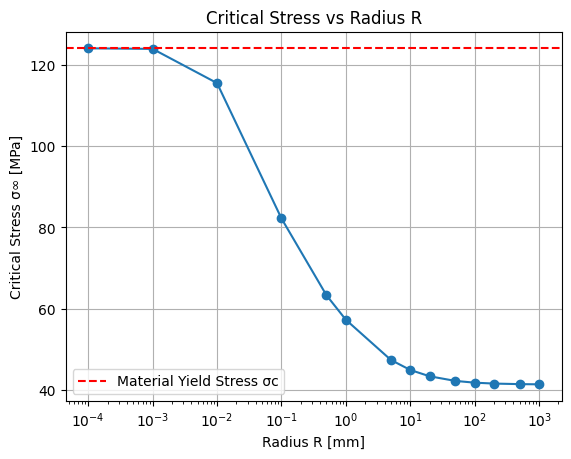

In [7]:
R = [.0001, 0.001,0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100, 200, 500, 1000]
sigma_from_R = []
for r in R:
    sigma_from_R.append(calcSigmafromR(r, K_Ic, sigma_c))

# Plot R vs sigma_from_R
plt.plot(R, sigma_from_R, marker='o')
plt.xscale('log')
plt.xlabel('Radius R [mm]')
plt.ylabel('Critical Stress σ∞ [MPa]')
plt.title('Critical Stress vs Radius R')
plt.grid(True)
plt.axhline(y=sigma_c, color='r', linestyle='--', label='Material Yield Stress σc')
plt.legend()
plt.show()

For small radii, the critical stress is much higher than for large crack lengths.

The stress concentration at the edge of the hole is independent of its radius. However, FFM does not evaluate the stress and the energy criterion there but a finite distance away from it. 


Therefore, the size ratio of the radius to $\Delta a$ is important for the calculation of the critical stress.
Both how fast the stress is reduced to the far field load as well as the Stress Intensity Factor highly depend on the radius.  


For very small radii, the stress in the ligament converges to the far field load even for short crack lengths $\Delta a$. Therefore, the failure load converges to the critical strength of the material.